In [1]:
#importing Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [3]:
# Reading the csv
polygons = pd.read_csv('./amenity_polygons.csv')

In [4]:
# Getting the number of Features and Values
polygons.shape

(6, 13)

In [5]:
#Feature and Values.
polygons.head()

,X,Y,osm_id,amenity,addr:housenumber,name,shop,brand,building,addr:postcode,addr:city,brand:wikidata,brand:wikipedia
0,76.996785,28.467475,738481371,school,Sector 9a,Sidheshwar Public School,NaN,NaN,NaN,122001.0,Gurgaon,NaN,NaN
1,77.002510,28.468300,351620323,NaN,NaN,Market Basket,supermarket,Market Basket,yes,NaN,NaN,Q2079198,en:Market Basket (New England)
2,77.002602,28.468522,351620341,NaN,NaN,NaN,supermarket,NaN,yes,NaN,NaN,NaN,NaN
3,77.004455,28.468866,738481372,fuel,NaN,Sector 9a Patrol Pump,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77.007111,28.470531,189074989,school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
polygons[0:2]

,X,Y,osm_id,amenity,addr:housenumber,name,shop,brand,building,addr:postcode,addr:city,brand:wikidata,brand:wikipedia
0,76.996785,28.467475,738481371,school,Sector 9a,Sidheshwar Public School,NaN,NaN,NaN,122001.0,Gurgaon,NaN,NaN
1,77.002510,28.468300,351620323,NaN,NaN,Market Basket,supermarket,Market Basket,yes,NaN,NaN,Q2079198,en:Market Basket (New England)


In [8]:
type(polygons.X.values)

numpy.ndarray

In [9]:
polygons_cords = pd.DataFrame({'x': polygons.X.values, 'y':polygons.Y.values})

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(polygons_cords)

In [40]:
kmeans.cluster_centers_

array([[77.00445469, 28.46886619,  0.        ],
       [77.00714176, 28.4733854 ,  3.        ],
       [77.00255619, 28.46841128,  4.5       ],
       [77.00711119, 28.4705312 ,  1.        ],
       [76.99678514, 28.4674747 ,  2.        ]])

In [41]:
kmeans.labels_

array([4, 2, 2, 0, 3, 1])

In [42]:
kmeans.inertia_

0.5000000287829263

In [43]:
polygons_cords['label'] = kmeans.labels_

In [44]:
polygons_cords

,x,y,label
0,76.996785,28.467475,4
1,77.002510,28.468300,2
2,77.002602,28.468522,2
3,77.004455,28.468866,0
4,77.007111,28.470531,3
5,77.007142,28.473385,1


In [45]:
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

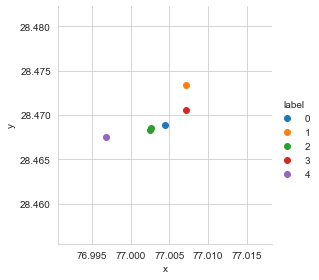

In [47]:
sns.set_style('whitegrid');
sns.FacetGrid(polygons_cords, hue='label', size=4) \
.map(plt.scatter, 'x', 'y') \
.add_legend();
plt.show();